In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

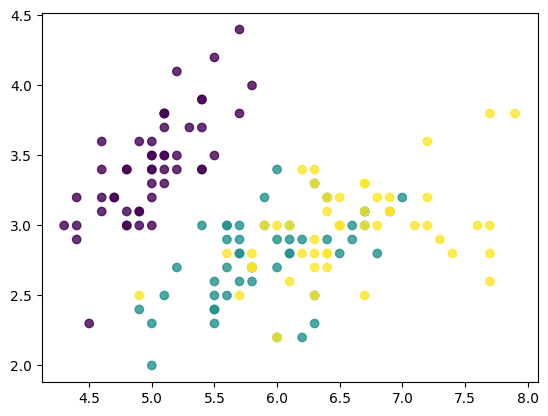

In [10]:
iris = load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

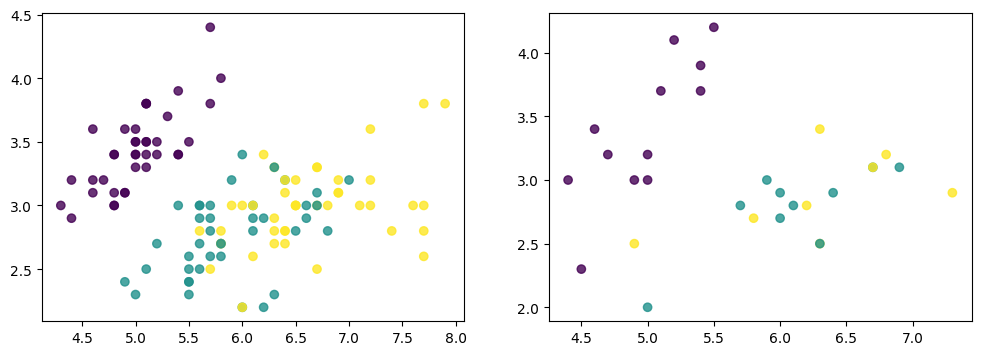

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
print('Train Score : ', model.score(X_train, y_train))
print('Train Score : ', model.score(X_test, y_test))

Train Score :  0.9916666666666667
Train Score :  0.9333333333333333


## Cross validation

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(KNeighborsClassifier(3), X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.9833333333333334)

Ici, nous pouvons tester les paramètres de notre modèle pour trouver le meilleure. cv représente le nombre de split de notre jeu de donné.

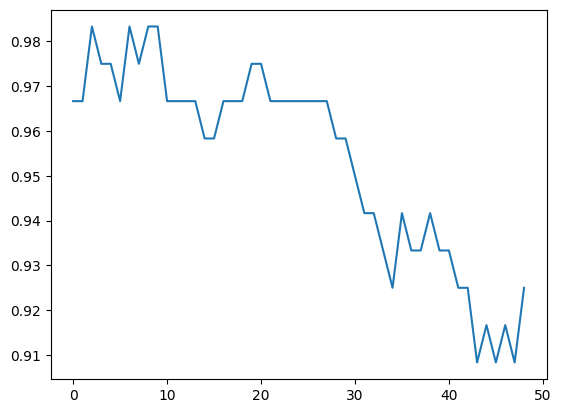

In [17]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score)

Voici différents type de cross validation

In [18]:
from sklearn.model_selection import KFold

In [19]:
cv = KFold(n_splits=5)
cross_val_score(KNeighborsClassifier(),X, y, cv=cv)

array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])

In [32]:
from sklearn.model_selection import LeaveOneOut

In [33]:
cv = LeaveOneOut()
cross_val_score(KNeighborsClassifier(),X, y, cv=cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
from sklearn.model_selection import StratifiedKFold

In [39]:
cv = StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(),X, y, cv=cv)

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

In [40]:
from sklearn.model_selection import GroupKFold

In [41]:
cv = GroupKFold(5).get_n_splits(X, y, groups=X[:, 0])
cross_val_score(KNeighborsClassifier(),X, y, cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

## Validation Curve

In [20]:
from sklearn.model_selection import validation_curve

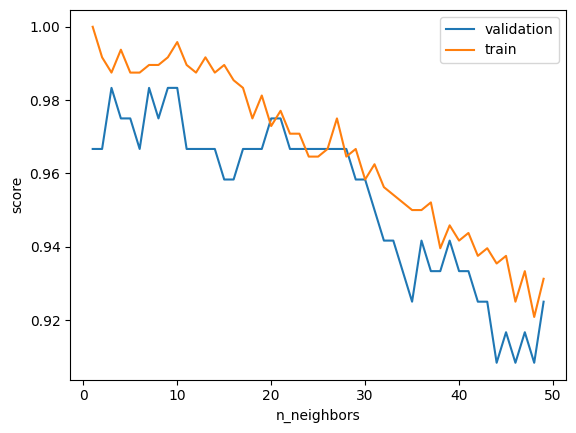

In [21]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5, scoring='accuracy')

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

Ici, on peut régler le model avec l'hyperparametre n_neighbors mais on peut aussi le régler sur la distance de manathan ou euclidienne, c'est pour ça que GridSearchCV intervient

## Gird Search

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_gird = {'n_neighbors': np.arange(1,20), 'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_gird, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [24]:
# Le meilleure
grid.best_score_

np.float64(0.9833333333333334)

In [25]:
# Meilleurs paramètres
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': np.int64(3)}

In [26]:
# Sauvegarder ce model
model = grid.best_estimator_

In [27]:
model.score(X_test, y_test)

0.9

On peut estimer nos données sur d'autres métrics

## Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, model.predict(X_test))
# On obtient une matrice carré 3, car nous avons 3 classes de fleures dans notre dataset

array([[12,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  7]])

![frontiere_decision](screens/confusion_matrix.png "frontiere_decision")

## Learning Curve

Cela nous permet de savoir si notre model continurai à apprendre avec des données suplémentaires. Un model arrête d'apprendre à un certain moment, comme la fin d'une logarithme. Learning Curve nous permet de déterminer si il faut mettre de l'energie dans la récolte de data dans le but d'avoir de meilleurs résultats

In [30]:
from sklearn.model_selection import learning_curve

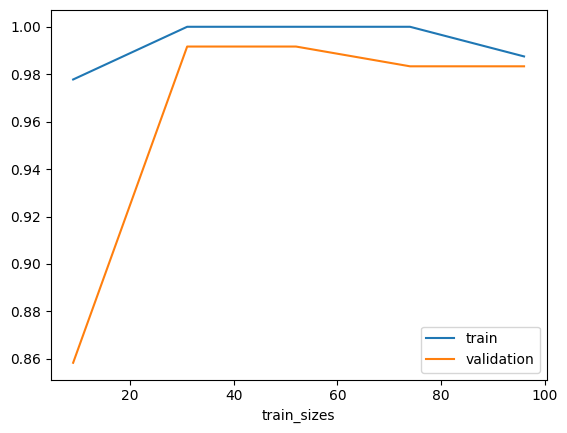

In [31]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 5),cv=5)
# dans train_size il faut mettre des pourcentages

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()